# Business Case:  Machine Learning Model on SME's Loan Admission  
## - Fenny Tsai

## Table of Contents
<ul>
    <li>Model Selection</li>
    <a href="#modelintro">1. Introduction</a><br>
        &emsp;<a href="#modelintro">1.1 Data Set</a><br>
        &emsp;<a href="#modelintro">1.2 Train Set</a><br>
    <a href="#prep">2. Data Preperation</a><br>
        &emsp;<a href="#prep">2.1 Test Set</a><br>
        &emsp;<a href="#train">2.2 Train Set</a><br>
        &emsp;&emsp;<a href="#normal">2.2.1 Data Normalization</a><br>
        &emsp;&emsp;<a href="#oversample">2.2.2 Data Oversampling</a><br>
    <a href="#model">3. Data Modeling</a><br>
    <a href="#conclude">4. Conclusion</a><br>
    <a href="#improve">5. Model Improvement</a><br>  
    <a href="#suggestintro">6. Business Suggestion</a><br> 
        &emsp;<a href="#suggestintro">6.1 Assess SME using Model + Financial Ratio</a><br>
        &emsp;&emsp;<a href="#appendix">Appendix - Financial Ratio Data Preperation</a><br>
        &emsp;<a href="#implement">6.2 Business Implementation with Model</a><br> 
    
</ul>

# Model Selection
<a id='modelintro'></a>
# 1. Introduction

In this project, the main objective is to develop models that can effectively predict whether to grant loans to small to medium-sized enterprises (SMEs) using supervised machine learning techniques. By utilizing these models, lenders can make informed decisions regarding loan approvals, mitigating the risk of default and optimizing their lending portfolios.

## 1.1 Data Set
The dataset utilized in this project is obtained from internal data sources, incorporating fields from both the income statement and balance sheet. It offers a comprehensive view of the financial status of small and medium-sized enterprises (SMEs). It comprises 36 features that capture essential financial information, including fields like Inventories, Receivables, Net Income and more. 

## 1.2 Model Selection
The project will explore various supervised machine learning algorithms to train and evaluate the dataset.The following machine learning models will be employed to train and assess the dataset:
1. Decision Tree
2. Logistic Regression
3. Random Forest
4. Support Vector Machine
5. K Nearest Neighbor


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import plot_roc_curve



import warnings
warnings.filterwarnings("ignore")

<a id='prep'></a>
# 2. Data Preperation

## 2.1 Test Set 

In [2]:
####X_test####
url = "/Users/hsingfentsai/Documents/Fenny/Job Search/Interview Prep/Validus/Technical Skill Test/Test.xlsx"
df_test = pd.read_excel(url, sheet_name=None)
sheet_names = df_test.keys()

In [3]:
PL_list = []
BS_list = []
for each in sheet_names:
    if 'PL' in each:
        PL_list.append(each)
    else:
        BS_list.append(each)

In [4]:
PL_df = pd.DataFrame()
for each in PL_list:
    df = pd.read_excel(url, sheet_name=each, header=None)
    df = df.T
    df.columns = df.iloc[0]
    df = df[1:]
    df.insert(4,'COGS', df.iloc[0,4:6].sum())
    df.insert(5,'Gross Profit', df['Revenue'] - df['COGS'])
    df.insert(9,'Total salary and expense',df.iloc[0,9:12].sum())
    df.drop(df.columns[[6,7,10,11,12]], axis=1, inplace=True)
    PL_df = pd.concat([PL_df,df], axis=0)
PL_df = PL_df.reset_index(drop=True)

In [5]:
BS_df = pd.DataFrame()
for each in BS_list:
    df = pd.read_excel(url, sheet_name=each, header=None)
    df = df.T
    df.columns = df.iloc[0]
    df = df[1:].reset_index(drop=True)
    df.insert(7,'Total Asset', df.iloc[0,4:7].sum())
    BS_df = pd.concat([BS_df,df], axis=0)
BS_df = BS_df.reset_index(drop=True)

In [6]:
X_test = pd.merge(PL_df, BS_df, on='UEN')
X_test.shape

(18, 33)

In [7]:
# Get the UEN numbers does not exist in BS_df
uu = PL_df[~PL_df['UEN'].isin(BS_df['UEN'])].iloc[0,0]
print('STAM\'s UEN No. that did not provide BS file data : ' + uu)

STAM's UEN No. that did not provide BS file data : 200010036F


In [8]:
###Y_test###
url = "/Users/hsingfentsai/Documents/Fenny/Job Search/Interview Prep/Validus/Technical Skill Test/test_label.csv"
y_test = pd.read_csv(url)
Y_test = pd.merge(X_test, y_test, on='UEN')
Y_test = Y_test.iloc[:,[-1]]
Y_test.shape

(18, 1)

In [9]:
X_test.rename(columns=lambda x: 'Y1_' + x, inplace=True)
X_test = X_test.iloc[:,1:]
X_test

,Y1_Revenue,Y1_Sales,Y1_other Rev,Y1_COGS,Y1_Gross Profit,Y1_total other Income,Y1_Total salary and expense,Y1_Total operating expense,Y1_Total Amortization and Depreciation,Y1_Total Financial Charges,...,Y1_Hire Purchase Creditors - Short term,Y1_Income Tax Payables,Y1_Amount owing to directors/shareholders/related parties,Y1_Total Current Liabilities,Y1_Long Term Loan,Y1_Hire Purchase Creditor_Long,Y1_Total Liabilities,Y1_Paid Up Capital,Y1_Retained Earning,Y1_Total Equity
0,720000,720000,0,6.229434e+05,97056.56,23413.2,0.000000e+00,85795.003,0,1710.317,...,99851.54,NaN,151259.49,318890.68,NaN,NaN,318890.68,60000,71554.8,131554.8
1,1360000,1360000,0,8.166864e+05,543313.6,4168.8,2.817360e+05,164028.2,0,0,...,NaN,NaN,NaN,69345,NaN,NaN,69345,100000,331531,431531
2,3440000,3440000,0,6.546330e+05,2785367.0,416596.8,5.861406e+05,607245,896092.4,263702.4,...,0,0,18764,243842,0,0,243842,2700000,219528,2919528
3,30990000,30990000,0,6.707259e+06,24282741.0,-115493.4,1.114809e+07,2850823.8,87679.3,226487.6,...,25038,0,33299930,35311660,1223344,57348,36592352,5534272,-2378781,3155491
4,13950000,13950000,0,4.125201e+06,9824798.832,0,1.533183e+06,343531.5,24449.075,138089.21,...,NaN,120000,NaN,695000,NaN,NaN,695000,NaN,385240.42,385240.42
5,2300000,2300000,0,1.496164e+06,803835.812,19248.271,2.311458e+05,235256.679,22112.769,1846.955,...,13866,NaN,673518.61,758353.69,NaN,NaN,758353.69,8813.97,134935.26,143749.23
6,670000,670000,0,2.167695e+05,453230.5,0,8.417250e+04,12272,20700,0,...,0,67,777586,801121,0,0,801121,100002,-734283,-634281
7,7630000,7630000,3200400,2.594900e+06,5035100,0,1.848000e+06,0,0,0,...,NaN,NaN,444000,509000,119110,350000,978110,1176000,24306890,25482890
8,16306093,16306093,0,4.471506e+06,11834587.0,-104994,7.962924e+06,3167582,46147,119204,...,25038,0,33299930,35311660,1223344,57348,36592352,5534272,-2378781,3155491
9,4232086,4232086,0,1.976513e+06,2255573.0,6522,8.349040e+05,1081505,0,2806,...,70070,70305,1549731,1753377,0,0,1753377,100000,5258921,5358921


In [10]:
#deal with NaN values, use mean to replace
na_list = (X_test.isna().sum()).to_list()
for i in range(len(na_list)):
    if na_list[i] > 0:
        mean = X_test[X_test.columns[i]].mean()
        X_test[X_test.columns[i]].fillna(mean, inplace=True)

In [11]:
#change data type to float
for i in range(X_test.shape[1]):
    X_test[X_test.columns[i]] = pd.to_numeric(X_test[X_test.columns[i]], errors='coerce')
    X_test[X_test.columns[i]] = X_test[X_test.columns[i]].astype(float)

In [12]:
# list = []
# for each in X_test.columns:
#     if (X_test[each]<0).any():
#         if each not in list:
#             list.append(each)
            
# for each in list:
#     X_test.loc[X_test[each]<0, each]*= -1

<a id='train'></a>
## 2.2 Train Set 

In [13]:
#read file 
train_url = "/Users/hsingfentsai/Documents/Fenny/Job Search/Interview Prep/Validus/Technical Skill Test/train_data.xlsx"
df_train = pd.read_excel(train_url, sheet_name='Raw_data')
df_train

,Application Date,UEN,Label,Financial as of,Y1_Revenue,Y1_Sales,Y1_other Rev,Y1_COGS,Y1_Gross Profit,Y1_total other Income,...,Y1_Hire Purchase Creditors,Y1_Income Tax Payables,Y1_Amount owing to directors/shareholders/related parties,Y1_Total Current Liabilities,Y1_Long Term Loan,Y1_Hire Purchase Creditor_Long,Y1_Total Liabilities,Y1_Paid Up Capital,Y1_Retained Earning,Y1_Total Equity
0,2018-11-13,200375496X,0,2018-11-11,2860000.0,2860000.0,0.0,27414.050,2832585.950,4934.4,...,0.0,0.00,126456.82,435485.56,0.0,0.0,435485.56,400000.0,-184445.81,215554.19
1,2018-11-27,201858669V,0,2018-10-28,1230000.0,1230000.0,0.0,394125.645,835874.355,432.0,...,0.0,13761.89,0.00,41879.89,193545.8,19048.0,254473.69,120000.0,198695.63,318695.63
2,2018-11-22,201473872D,0,2018-10-28,4730000.0,4730000.0,2284000.0,1917600.000,5096400.000,0.0,...,398000.0,6678000.00,3260000.00,NaN,9938000.0,660000.0,8218000.00,8878000.0,-85939.00,NaN
3,2018-11-24,201312946M,1,2018-10-21,3167178.0,3167178.0,0.0,473822.040,2693355.960,0.0,...,196628.0,NaN,NaN,289192.00,NaN,NaN,289192.00,1000000.0,996046.76,1996046.76
4,2018-10-18,200918909H,0,2018-10-16,1490207.0,1490207.0,0.0,927320.000,562887.000,0.0,...,14639.0,0.00,0.00,563410.00,0.0,49615.0,613025.00,240000.0,141466.00,381466.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2018-12-09,201817341G,0,2017-03-01,7340000.0,7340000.0,0.0,4685329.200,2654670.800,0.0,...,0.0,0.00,400000.00,1047182.00,0.0,0.0,1047182.00,450000.0,56897.00,506897.00
226,2018-11-27,201858669V,0,2017-02-11,1230000.0,1230000.0,0.0,394125.645,835874.355,432.0,...,0.0,13761.89,0.00,41879.89,193545.8,19048.0,254473.69,120000.0,198695.63,318695.63
227,2018-11-27,201858669V,0,2017-02-11,1230000.0,1230000.0,0.0,394125.645,835874.355,432.0,...,0.0,13761.89,0.00,41879.89,193545.8,19048.0,254473.69,120000.0,198695.63,318695.63
228,2018-02-03,201754368V,0,2017-01-04,1210000.0,1210000.0,0.0,256956.420,953043.580,0.0,...,NaN,NaN,NaN,129750.34,NaN,NaN,129750.34,100000.0,39295.00,254501.00


<a id='clean'></a>
### 2.2.1 Data Cleaning
1. Remove Outdated Data
2. Remove Duplicate data

In [14]:
df_train = df_train[~(df_train['Financial as of'] < '2018-01-01')]
df_train.drop_duplicates(subset='UEN', inplace=True)
df_train.shape

(173, 36)

In [15]:
###Y_train###
Y_train = df_train.iloc[:,[2]]
Y_train.shape

(173, 1)

In [16]:
df_train.drop(df_train.columns[[0, 1, 3]], axis=1, inplace=True)
X_train = df_train.iloc[:,1:]
Y_train = df_train.iloc[:,[0]]
X_train.shape

(173, 32)

In [17]:
#change data type to float
X_train['Y1_Total Selling and Distribution expense'] = pd.to_numeric(X_train['Y1_Total Selling and Distribution expense'], errors='coerce')
X_train['Y1_Total Selling and Distribution expense'] = X_train['Y1_Total Selling and Distribution expense'].astype(float)

In [18]:
#deal with NaN values, use mean to replace
na_list = (X_train.isna().sum()).tolist()
for i in range(len(na_list)):
    if na_list[i] > 0:
        mean = X_train[X_train.columns[i]].mean()
        X_train[X_train.columns[i]].fillna(mean, inplace=True)

<a id='normal'></a>
### 2.2.2 Data Normalization

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.fit_transform(X_test[X_test.columns])

<a id='oversampling'></a>
### 2.2.3 Data Oversampling

In [20]:
Y_train.value_counts()

Label
0        151
1         22
dtype: int64

1. RandomOverSampler

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(X_train, Y_train)
y_ros.value_counts()

Label
0        151
1        151
dtype: int64

2. SMOTE

In [28]:
from imblearn.over_sampling import SMOTE
X_smote,Y_smote = SMOTE(random_state=1).fit_resample(X_train, Y_train)
Y_smote.value_counts()

Label
0        151
1        151
dtype: int64

<a id='model'></a>
# 3. Data Modelling
1. Decision Tree

ROS
Recall Rate: 0.0
Accuracy: 0.6666666666666666 

SMOTE
Recall Rate: 0.0
Accuracy: 0.6666666666666666


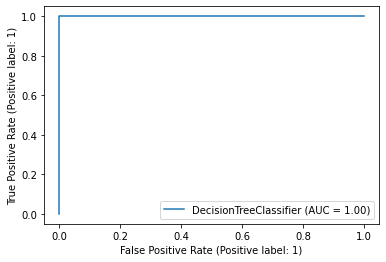

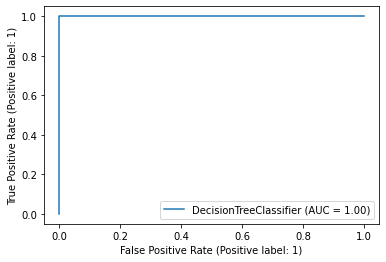

In [36]:
from sklearn.tree import DecisionTreeClassifier

#Random Over Sampling
dt = DecisionTreeClassifier()
dt.fit(x_ros, y_ros)
pred = dt.predict(X_test)
recall = recall_score(Y_test, pred)
accuracy = accuracy_score(Y_test, pred)

print('ROS')
print('Recall Rate:', recall)
print("Accuracy:", accuracy , '\n')
plot_roc_curve(dt, x_ros, y_ros);

#SMOTE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_smote, Y_smote)
pred = dt.predict(X_test)
recall = recall_score(Y_test, pred)
accuracy = accuracy_score(Y_test, pred)

print('SMOTE')
print('Recall Rate:', recall)
print("Accuracy:", accuracy)
plot_roc_curve(dt, X_smote, Y_smote);

2. Logistic Regression

ROS
Recall Rate: 0.5
Accuracy: 0.6111111111111112 

SMOTE
Recall Rate: 0.6666666666666666
Accuracy: 0.6666666666666666


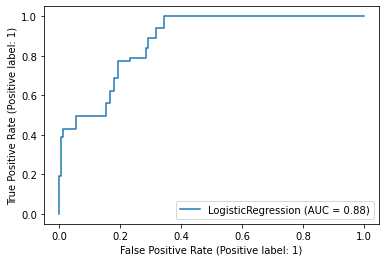

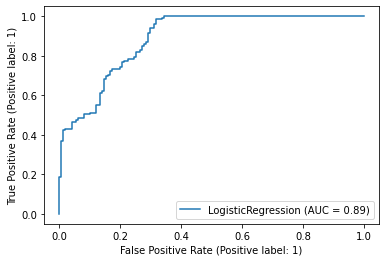

In [30]:
from sklearn import linear_model

#Random Over Sampling
model = linear_model.LogisticRegression(random_state=1)
model.fit(x_ros,y_ros)
pred = model.predict(X_test)
recall = recall_score(Y_test, pred)
accuracy = accuracy_score(Y_test, pred)

print('ROS')
print('Recall Rate:', recall)
print("Accuracy:", accuracy , '\n')
plot_roc_curve(model, x_ros, y_ros);

#SMOTE
model = linear_model.LogisticRegression(random_state=1)
model.fit(X_smote, Y_smote)
pred = model.predict(X_test)
recall = recall_score(Y_test, pred)
accuracy = accuracy_score(Y_test, pred)

print('SMOTE')
print('Recall Rate:', recall)
print("Accuracy:", accuracy)
plot_roc_curve(model, X_smote, Y_smote);

3. Random Forest

ROS
Recall Rate: 0.0
Accuracy: 0.6666666666666666 

SMOTE
Recall Rate: 0.0
Accuracy: 0.6666666666666666


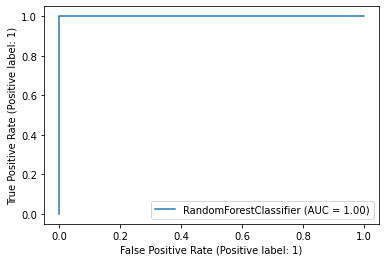

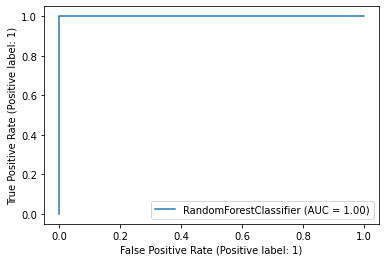

In [31]:
from sklearn import ensemble

#Random Over Sampling
model = ensemble.RandomForestClassifier(n_estimators=100,random_state=1)
model.fit(x_ros,y_ros)
pred = model.predict(X_test)
recall = recall_score(Y_test, pred)
accuracy = accuracy_score(Y_test, pred)

print('ROS')
print('Recall Rate:', recall)
print("Accuracy:", accuracy , '\n')
plot_roc_curve(model, x_ros, y_ros);

#SMOTE
model = ensemble.RandomForestClassifier(random_state=1)
model.fit(X_smote,Y_smote)
pred = model.predict(X_test)
recall = recall_score(Y_test, pred)
accuracy = accuracy_score(Y_test, pred)

print('SMOTE')
print('Recall Rate:', recall)
print("Accuracy:", accuracy)
plot_roc_curve(model, X_smote, Y_smote);

4. Support Vector Machine

ROS
Recall Rate: 0.6666666666666666
Accuracy: 0.6111111111111112 

SMOTE
Recall Rate: 0.8333333333333334
Accuracy: 0.6666666666666666


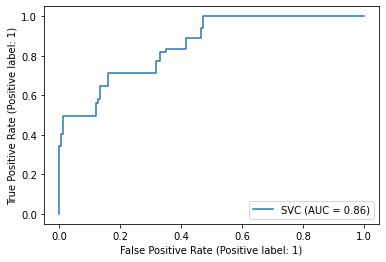

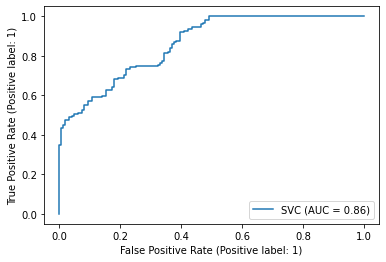

In [33]:
from sklearn.svm import SVC
#Random Over Sampling
svm = SVC()
svm.fit(x_ros, y_ros)
pred = svm.predict(X_test)
recall = recall_score(Y_test, pred)
accuracy = accuracy_score(Y_test, pred)

print('ROS')
print('Recall Rate:', recall)
print("Accuracy:", accuracy , '\n')
plot_roc_curve(svm, x_ros, y_ros);

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_smote, Y_smote)
pred = svm.predict(X_test)
recall = recall_score(Y_test, pred)
accuracy = accuracy_score(Y_test, pred)

print('SMOTE')
print('Recall Rate:', recall)
print("Accuracy:", accuracy)
plot_roc_curve(svm, X_smote, Y_smote);

5. K Nearest Neighbors

ROS
Recall Rate: 0.16666666666666666
Accuracy: 0.6111111111111112 

SMOTE
Recall Rate: 0.5
Accuracy: 0.7222222222222222


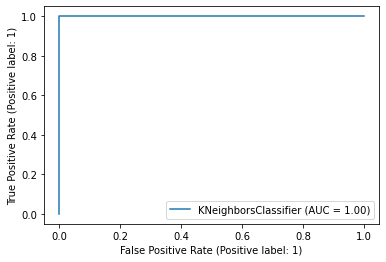

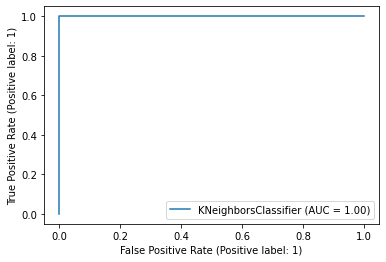

In [34]:
from sklearn.neighbors import KNeighborsClassifier
#Random Over Sampling
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_ros, y_ros)
pred = knn.predict(X_test)
recall = recall_score(Y_test, pred)
accuracy = accuracy_score(Y_test, pred)

print('ROS')
print('Recall Rate:', recall)
print("Accuracy:", accuracy , '\n')
plot_roc_curve(knn, x_ros, y_ros);

#SMOTE
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_smote, Y_smote)
pred = knn.predict(X_test)
recall = recall_score(Y_test, pred)
accuracy = accuracy_score(Y_test, pred)

print('SMOTE')
print('Recall Rate:', recall)
print("Accuracy:", accuracy)
plot_roc_curve(knn, X_smote, Y_smote);

#### Improve Model - SVM

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001]
}
svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_smote, Y_smote)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

pred = best_estimator.predict(X_test)
recall = recall_score(Y_test, pred)

print("Best Parameters:", best_params)
print("Recall:", recall)
cm = confusion_matrix(Y_test,pred)
print("accuracy", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

Best Parameters: {'C': 10, 'gamma': 0.1}
Recall: 0.3333333333333333
accuracy 0.7222222222222222


<a id='conclude'></a>
# 4. Conclusion

- Random Over Sampling
|  | Accuracy | Recall Rate |
| --------- | -------- | -------- |
| Decision Tree | 0.67 | 0.0 |
| Logistic Regression | 0.61 | 0.5 |
| Random Forest | 0.67 | 0.0 |
| Support Vector Machine| 0.61 | 0.67 |
| K Nearest Neighbor | 0.61 | 0.16 |

- SMOTE
|  | Accuracy | Recall Rate |
| --------- | -------- | -------- |
| Decision Tree | 0.67 | 0.0 |
| Logistic Regression | 0.67 | 0.67 |
| Random Forest | 0.67 | 0.0 |
| <b>Support Vector Machine| <b>0.67 | <b>0.83 |
| K Nearest Neighbor | 0.72 | 0.5 |


<br><br>
In this task, the main objective is to assess whether an SME (Small and Medium Enterprise) is good or bad in order to minimize the probability of default in the future, should a loan be granted to them.

Therefore, our focus lies on reducing **Type 2 Error**, also known as **False Negatives**. A False Negative occurs when the model incorrectly predicts a company as good when, in reality, it is a bad company. Preventing this error is crucial because if we mistakenly categorize a bad company as good, there is a risk of providing a loan that may not be repaid on time or at all.

To address this concern, we aim to achieve a higher **Recall Rate**. The recall rate, often referred to as sensitivity or true positive rate, is a performance metric that quantifies the proportion of actual bad companies correctly identified as bad by the model. A higher recall rate signifies that the model is better at capturing the bad companies, thus reducing the number of False Negatives.

By striving for a higher recall rate, we prioritize the accurate identification of bad companies, reducing the risk of lending to entities that are more likely to default. This approach enhances the overall performance of the model by minimizing the chances of extending loans to companies with a higher probability of failing to repay the loan.

To conclude, we will choose the Support Vector Machine (SVM) model with 'SMOTE' oversampling as our final selection since it achieves the highest 'Recall Rate' compared to all other models.

<a id='improve'></a>
# 5. Improvement


Although the SVM model currently achieves a **Recall Rate of 0.83** and a **Accuracy of 0.67**, there are steps we can take to further enhance its performance. One key approach is to acquire additional data, as doing so has the potential to improve the model's ability to generalize and capture the underlying patterns in the dataset.

Currently, our model is based on a dataset that includes only 173 rows of data after thorough cleaning, which involved removing outdated and duplicate entries. To expand the dataset and enhance the model's performance, we should consider gathering more relevant data points. This can be achieved by reaching out to additional sources or collecting data over an extended period of time.

By increasing the size and diversity of our dataset, we provide the model with a broader range of examples to learn from. This can help it better understand the underlying patterns and relationships within the data, leading to improved predictive performance.

Therefore, by actively seeking out more relevant data points and expanding our dataset, we can increase the chances of achieving even better performance with the SVM model and further enhance its ability to accurately predict and classify SMEs.


<a id='suggestintro'></a>
# 6. Business Suggestion

## 6.1 Assess SME using Model + Financial Ratio

To better maximize our company business, we should collaborate with those 'good' company who pay the loan in time. So that our business funds can run longer in the future.

To achieve this, we can use the model we created above to first better filter out the bad company, and from these good company, we can then use other rating indicators such as "Liquidity Ratio" and "Solvency Ratio" to identify and measure the loan quialification of a particular SME.

- Following are the some common type of **Liquidity Ratio** that we can take into consideration for a company's ability to pay off its **short-term** liabilities:<br>
1. Current Ratio: Current Assets / Current Liabilities 
2. Quick Ratio: (Current Asset-Inventories-Prepaid Expenses)/ Current Liabilities 
3. Cash Ratio: Cash and equivalent / Current liabilities

- Following are the some common type of **Solvency Ratio** that we can take into consideration to assess a company's **long-term** financial obligations - the repayment of debt principal and interest expense ability:
1. Solvency Ratio: (Net Income + Depreciation) / All Liabilities (Short-term + Long-term Liabilities)<br>
2. Debt-to-Equity Ratio: Total debt / Total Assets
3. Debt-to-Asset Ratio: Total Shareholder's Equity / Total Assets

Take **Current Ratio** as an example.
<figure>
    <img src="img/Current Ratio.png" style="width:1200px;" >
</figure>

In general, it is commonly believed that a Current ratio greater than 2 is considered favorable, indicating a better short-term solvency ability. If the Current ratio is too low, it suggests poor short-term debt repayment capacity. On the other hand, if the ratio is too high, it indicates low efficiency in utilizing company funds. 

It is important to consider the Current ratio in conjunction with the amount of accounts receivable and the inventory turnover rate to better assess the company's solvency.


Take **Debt-to-Equity Ratio** as another example.
<figure>
    <img src="img/Debt to Equity Ratio.png" style="width:1200px;" >
</figure>

A higher Debt to Equity Ratio indicates a higher level of debt relative to equity, suggesting that the company relies more heavily on debt financing. This may indicate a higher financial risk as the company has a greater obligation to repay its debt. Conversely, a lower Debt to Equity Ratio suggests a lower level of debt compared to equity, indicating a lower financial risk and a stronger equity base.

<a id='appendix'></a>
### Appendix - Financial Ratio Data Preperation

In [432]:
train_url = "/Users/hsingfentsai/Documents/Fenny/Job Search/Interview Prep/Validus/Technical Skill Test/train_data.xlsx"
df_train = pd.read_excel(train_url, sheet_name='Raw_data')
df_train = df_train[~(df_train['Financial as of'] < '2018-01-01')]
df_train.drop_duplicates(subset='UEN', inplace=True)
df_train.shape

(173, 36)

In [433]:
df_train['Current Ratio'] = df_train['Y1_Total Current Asset'] / df_train['Y1_Total Current Liabilities']
df_train['Quick Ratio'] = (df_train['Y1_Total Current Asset']-df_train['Y1_Inventories']) / df_train['Y1_Total Current Liabilities']
df_train['Cash Ratio'] = df_train['Y1_Cash'] / df_train['Y1_Total Current Liabilities']

In [434]:
df_train['Solvency Ratio'] = (df_train['Y1_Net Income']+df_train['Y1_Total Amortization and Depreciation'])/df_train['Y1_Total Liabilities']
df_train['Debt-to-Equity Ratio'] = (df_train['Y1_Term Loan']+ df_train['Y1_Long Term Loan']) / df_train['Y1_Total Asset']
df_train['Debt-to-Asset Ratio'] = df_train['Y1_Total Equity'] / df_train['Y1_Total Asset']


In [435]:
df_train.to_csv('df_train with ratio',index=False)

In [436]:
df_train.shape

(173, 42)

In [442]:
df_train_ratio = df_train.iloc[:,[0,1,2,3,36,37,38,39,40,41]]
df_train_ratio

,Application Date,UEN,Label,Financial as of,Current Ratio,Quick Ratio,Cash Ratio,Solvency Ratio,Debt-to-Equity Ratio,Debt-to-Asset Ratio
0,2018-11-13,200375496X,0,2018-11-11,1.484411,1.484411,0.097776,1.899073,0.065815,0.331092
1,2018-11-27,201858669V,0,2018-10-28,12.496578,12.496578,0.681838,1.370754,0.337676,0.556024
2,2018-11-22,201473872D,0,2018-10-28,NaN,NaN,NaN,0.354028,NaN,NaN
3,2018-11-24,201312946M,1,2018-10-21,7.342273,NaN,0.282484,1.689247,NaN,0.873452
4,2018-10-18,200918909H,0,2018-10-16,1.737740,1.037651,0.007208,0.149867,0.261078,0.383579
...,...,...,...,...,...,...,...,...,...,...
169,2018-01-02,201113499E,0,2018-01-02,10.020273,10.020273,1.951571,0.158574,0.475151,0.505401
170,2018-07-24,200465108E,0,2018-01-01,3.783833,3.783833,0.000000,0.727592,0.090095,0.595149
171,2018-02-23,201013060G,0,2018-01-01,2.138873,2.138873,0.250193,0.291329,0.127858,0.392391
172,2018-01-29,201021559K,0,2018-01-01,0.228046,0.228046,0.020238,0.008458,0.566691,-0.456782


In [443]:
df_train_ratio.describe()

,Label,Current Ratio,Quick Ratio,Cash Ratio,Solvency Ratio,Debt-to-Equity Ratio,Debt-to-Asset Ratio
count,173.000000,159.000000,132.000000,160.000000,162.000000,134.000000,161.000000
mean,0.127168,inf,inf,inf,inf,0.316473,0.291784
std,0.334128,NaN,NaN,NaN,NaN,1.091297,0.918977
min,0.000000,0.100909,0.092046,-0.001708,-3.855711,0.000000,-6.812012
25%,0.000000,1.087174,0.843415,0.019201,0.105910,0.000000,0.184213
50%,0.000000,1.585281,1.405428,0.108891,0.442935,0.124630,0.392391
75%,0.000000,3.756447,2.534162,0.333051,1.667954,0.339986,0.565616
max,1.000000,inf,inf,inf,inf,10.393590,1.000000


In [451]:
df_train.loc[df_train_ratio['UEN'] == '200976333H', 'Y1_Total Liabilities']

48    3300.0
Name: Y1_Total Liabilities, dtype: float64

In [445]:
df_train_ratio[df_train_ratio['UEN'] == '200976333H']

,Application Date,UEN,Label,Financial as of,Current Ratio,Quick Ratio,Cash Ratio,Solvency Ratio,Debt-to-Equity Ratio,Debt-to-Asset Ratio
48,2018-08-09,200976333H,0,2018-05-09,35.345758,35.345758,28.400303,188.420273,0.0,0.971708


In [ ]:
df_train[df_train['Y1_Total Current Asset'] == 0]

<a id='implement'></a>
## 6.2. Business Implementation with Model
In addition, we can also utilize the created model to achieve the following business suggestions:

### 6.2.1 Credit Scoring and Risk Assessment Services:
- Credit Risk Assessment:

Utilize the model to evaluate the credit risk of loan applicants. Offer a credit risk assessment service that assesses the possibility of loan repayment using the model's predictions. This can give lenders a thorough evaluation of the applicant's creditworthiness so they can decide on loan approval and interest rates with additional information.

- Loan Approval Decision Support: 

Based on the model's predictions, create a loan approval decision support system. To aid loan officers in deciding whether to approve a loan, provide a user-friendly platform that includes the model's algorithms and data analytic capabilities. Based on the applicant's financial data, the system can offer recommendations or risk scores, facilitating quicker and more precise loan approval procedures.

- Market Insights and Loan Approval Adaptation:

Offer lending firms regular reports and analyses that provide valuable insights into industry trends, risk factors, and comparisons to similar institutions. This service ensures up-to-date knowledge of the market landscape, enabling lenders to adjust their loan approval strategies with a deeper understanding of prevailing conditions."